In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Loading the dataset into DataFrame
df= pd.read_csv("Data.csv")

In [5]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.shape

(614, 13)

The dataset consists of 614 rows and 13 columns.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
# Descriptive statistics of the numerical variables
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [16]:
# Descriptive statistics of the categorical variables
df.describe(include= object)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


Exploratory Data Analysis (EDA)

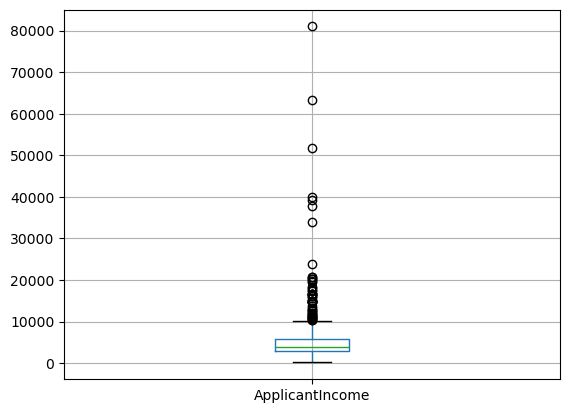

In [18]:
# box plot of ApplicantIncome variable
df.boxplot(column= 'ApplicantIncome') #checking for outliers
plt.show()

There are outliers in the ApplicantIncome variable

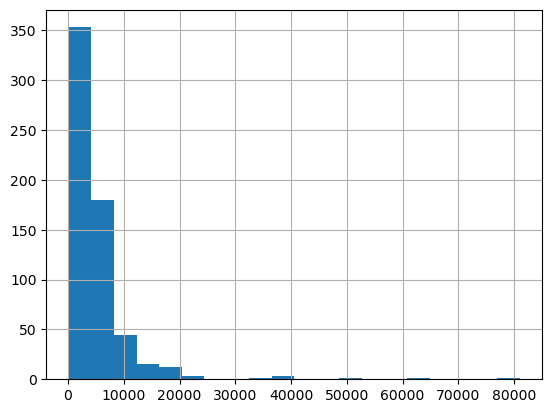

In [21]:
# Histogram distribution of ApplicantIncome 
df['ApplicantIncome'].hist(bins=20)
plt.show()

The distribution of ApplicantIncome is skewed to the right.

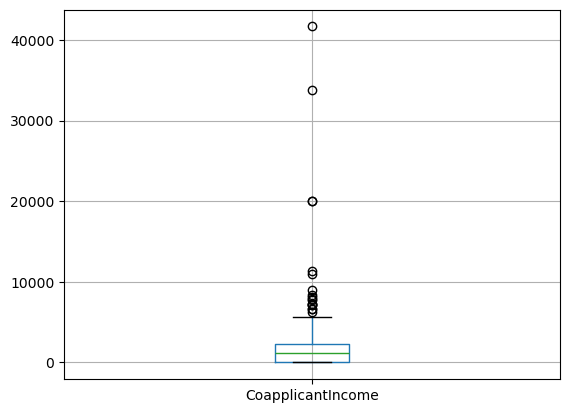

In [25]:
# box plot of CoapplicantIncome
df.boxplot(column= 'CoapplicantIncome') # checking for outliers
plt.show()

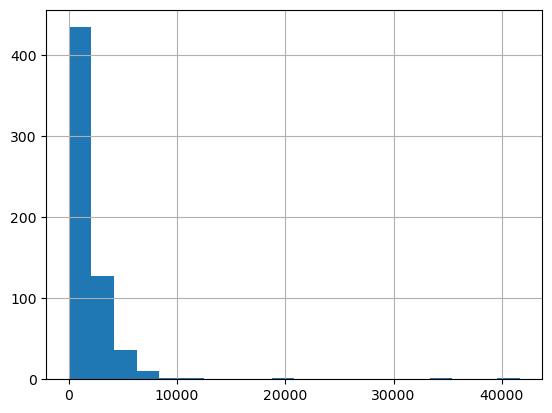

In [27]:
# Histogram Distribution of CoapplicantIncome
df['CoapplicantIncome'].hist(bins= 20)
plt.show()

The distribution is skewed to the right.

Data Cleaning

In [31]:
# removing Loan_Id column
df.drop(['Loan_ID'], axis= 1, inplace= True)

In [33]:
#checking for null values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [35]:
# Imputation of the missing values in categorical data using mode
df['Gender']= df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']= df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']= df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']= df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Loan_Amount_Term']= df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [37]:
# Imputation of the missing values in numerical data using mean
df['LoanAmount']= df['LoanAmount'].fillna(df['LoanAmount'].mode()[0])
df['Credit_History']= df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [39]:
# checking for null values after imputation
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Encoding Categorical Variables

In [42]:
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [44]:
# Converting categorical variables into dummy/indicator variables using one-hot encoding
df_encoded = pd.get_dummies(df)


In [46]:
df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,120.0,360.0,1.0,False,True,True,False,True,...,False,True,False,True,False,False,False,True,False,True
1,4583,1508.0,128.0,360.0,1.0,False,True,False,True,False,...,False,True,False,True,False,True,False,False,True,False
2,3000,0.0,66.0,360.0,1.0,False,True,False,True,True,...,False,True,False,False,True,False,False,True,False,True
3,2583,2358.0,120.0,360.0,1.0,False,True,False,True,True,...,False,False,True,True,False,False,False,True,False,True
4,6000,0.0,141.0,360.0,1.0,False,True,True,False,True,...,False,True,False,True,False,False,False,True,False,True


In [48]:
# Droping unneeded features
df_encoded = df_encoded.drop(['Gender_Female', 
                            'Married_No', 
                            'Education_Not Graduate',
                            'Self_Employed_No', 
                            'Loan_Status_N'], axis = 1) # axis = 1 for column



In [50]:
# Renaming existing columns
new_col = {'Gender_Male': 'Gender', 
                   'Married_Yes': 'Married', 
                   'Education_Graduate': 'Education', 
                   'Self_Employed_Yes': 'Self_Employed',
                   'Loan_Status_Y': 'Loan_Status'}

In [52]:
# renaming columns
df_encoded.rename(columns=new_col, inplace=True)


In [54]:
# column names of the DataFrame
column_names = df_encoded.columns.tolist()

Normalizing variables

In [57]:
# Normalizing the numerical data to handle the outliers
df_encoded['LoanAmount_log']= np.log(df_encoded['LoanAmount'])

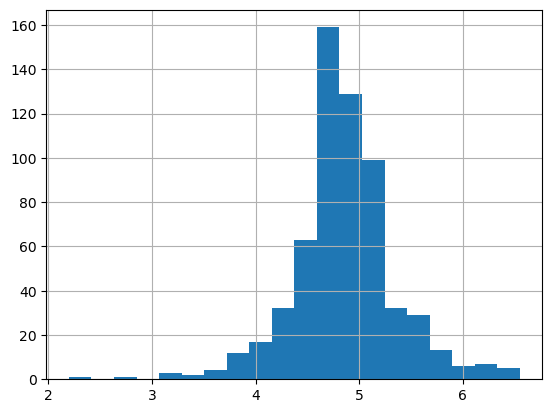

In [59]:
df_encoded['LoanAmount_log'].hist(bins= 20)
plt.show()

The data is now normally distributed

In [62]:
# combining Coapplicant income and ApplicantIncome into TotalIncome
df_encoded['TotalIncome']= df_encoded['ApplicantIncome'] + df_encoded['CoapplicantIncome']

# Normalizing TotalIncome using log
df_encoded['TotalIncome_log']= np.log(df_encoded['TotalIncome'])


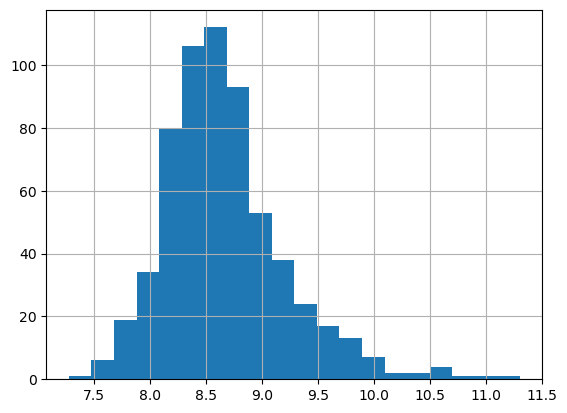

In [64]:
# Histrogram of TotalIncome after normalization
df_encoded['TotalIncome_log'].hist(bins=20)
plt.show()

Data Preprocessing

In [67]:
# Splitting data into features and target
X= df_encoded.drop(columns= ['Loan_Status']) # features

# Target variable
y= df_encoded['Loan_Status']
                   

In [69]:
# importing library
from sklearn.preprocessing import StandardScaler

In [70]:
scaler= StandardScaler()

In [73]:
#Scaling the features 
X= scaler.fit_transform(X)

In [75]:
# Splitting data into training and testing data
from sklearn.model_selection import train_test_split
# train_size= 80% and test_size = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size= 0.2, random_state=0)

In [77]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of Y_test:", y_test.shape)

Shape of X_train: (491, 19)
Shape of X_test: (123, 19)
Shape of Y_train: (491,)
Shape of Y_test: (123,)


 Model Selection

In [80]:
from sklearn.tree import DecisionTreeClassifier  # For Decision Tree Classifier Model

# defining the model
dt_classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)

#fitting the model
dt_classifier.fit(X_train, y_train)
 


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [82]:
# making prediction
y_pred_dt= dt_classifier.predict(X_test)
y_pred_dt

array([ True,  True,  True, False,  True, False,  True,  True, False,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True, False, False,  True, False,  True,  True,  True,  True,
       False, False, False,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True, False, False,  True,  True,
       False,  True,  True,  True, False,  True, False,  True,  True,
       False,  True,  True,  True,  True, False, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False, False,  True, False,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True, False,
        True, False,  True, False,  True,  True, False, False,  True,
        True, False, False,  True, False,  True])

In [84]:
# The accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_dt= accuracy_score(y_pred_dt, y_test)
print ("Decision Tree Classifier accuracy: ", accuracy_dt)

Decision Tree Classifier accuracy:  0.7235772357723578


Naive Bayes Model

In [87]:
from sklearn.naive_bayes import GaussianNB
# defining the model)
nb_classifier= GaussianNB()

#fitting the model
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [89]:
# making prediction
y_pred_nb= nb_classifier.predict(X_test)
y_pred_nb

array([ True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True, False,  True])

In [91]:
# accuracy for Naive Bayes 
accuracy_nb= accuracy_score(y_pred_nb, y_test)
print ("Naive Bayes Classifier accuracy: ", accuracy_nb)

Naive Bayes Classifier accuracy:  0.8292682926829268


Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression 

# Defining a model
lr_classifier= LogisticRegression()

#fitting the model
lr_classifier.fit(X_train, y_train)

LogisticRegression()

In [96]:
# making prediction
y_pred_lr= lr_classifier.predict(X_test)
y_pred_lr

array([ True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True, False,  True])

In [98]:
# accuracy for Logistic Regression 
accuracy_lr= accuracy_score(y_pred_lr, y_test)
print ("Logistic Regression accuracy: ", accuracy_lr)

Logistic Regression accuracy:  0.8373983739837398


Logistic Regression Model have high accuracy.